<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/BayesIng%C3%AAnuoCategorico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [7]:
import sklearn

In [8]:
sklearn.__version__

'1.0.2'

In [24]:
df = pd.DataFrame(columns= ['Casado', 'Comprou'])
df.loc[0,:] = ['Sim', 1]
df.loc[1,:] = ['Sim', 1]
df.loc[2,:] = ['Não', 1]
df.loc[3,:] = ['Sim', 1]
df.loc[4,:] = ['Não', 1]
df.loc[5,:] = ['Não', 1]
df.loc[6,:] = ['Sim', 1]
df.loc[7,:] = ['Não', 1]
df

,Casado,Comprou
0,Sim,1
1,Sim,1
2,Não,1
3,Sim,1
4,Não,1
5,Não,1
6,Sim,1
7,Não,1


In [25]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.]])

In [11]:
enc.categories_

[array(['Não', 'Sim'], dtype=object), array([1], dtype=object)]

In [26]:
df_pre = pd.DataFrame(enc.fit_transform(df), columns= df.columns, dtype= int)
df_pre

,Casado,Comprou
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
5,0,0
6,1,0
7,0,0


In [27]:
X = df_pre[['Casado']]
y = df_pre['Comprou']

In [17]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB(alpha= 0)


In [28]:
cnb.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


CategoricalNB(alpha=0)

In [30]:
para_predizer = pd.DataFrame(columns= ['Casado'])
para_predizer.loc[0,:] = [0]
para_predizer.loc[1, :] = [1]
para_predizer

,Casado
0,0
1,1


In [31]:
cnb.predict_proba(para_predizer)

array([[1.],
       [1.]])

In [32]:
df = pd.read_csv('/content/base_categoricalnb.csv')
df

,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,no
2,services,married,high.school,no,yes,no,telephone,may,mon,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,services,married,high.school,no,no,yes,telephone,may,mon,no
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,yes


In [33]:
from sklearn.model_selection import train_test_split
X = df.drop('y', axis= 1)
y = df['y']


In [35]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y,test_size= 0.3,random_state= 61658)

In [39]:
end = OrdinalEncoder()
x_tr2 = pd.DataFrame(end.fit_transform(x_treino), columns= x_treino.columns,dtype= int)
x_tr2


,job,marital,education,default,housing,loan,contact,month,day_of_week
0,1,1,1,1,2,0,0,3,3
1,4,1,6,0,0,0,1,4,3
2,7,0,3,0,2,2,0,7,1
3,4,0,6,0,2,0,1,6,3
4,9,1,2,0,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...
28826,11,1,7,0,2,0,0,9,4
28827,1,1,5,1,0,2,1,6,3
28828,8,2,3,0,1,1,0,1,3
28829,0,2,3,0,0,0,0,0,2


In [40]:
x_ts2 = pd.DataFrame(end.transform(x_teste), columns= x_teste.columns, dtype= int)
x_ts2

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,0,1,6,0,2,2,0,3,4
1,5,1,0,1,2,0,1,6,2
2,7,2,3,0,2,0,0,6,3
3,10,1,3,0,0,2,1,6,2
4,1,1,1,0,2,0,1,6,3
...,...,...,...,...,...,...,...,...,...
12352,2,2,6,1,2,0,1,4,0
12353,0,2,3,0,0,0,0,3,2
12354,9,2,5,0,2,0,0,1,1
12355,4,2,6,0,2,2,1,6,3


In [42]:
from sklearn.preprocessing import LabelEncoder
end2 = LabelEncoder()
y_tr2 = end2.fit_transform(y_treino)
y_tr2

array([0, 0, 0, ..., 1, 0, 0])

In [43]:
y_ts2 = end2.transform(y_teste)
y_ts2

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
cnb2 = CategoricalNB(alpha= 0)
cnb2.fit(x_tr2, y_tr2)

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


CategoricalNB(alpha=0)

In [45]:
pred = cnb2.predict_proba(x_ts2)
pred

array([[0.82459352, 0.17540648],
       [0.97221911, 0.02778089],
       [0.91123809, 0.08876191],
       ...,
       [0.81793751, 0.18206249],
       [0.9515477 , 0.0484523 ],
       [0.97593682, 0.02406318]])

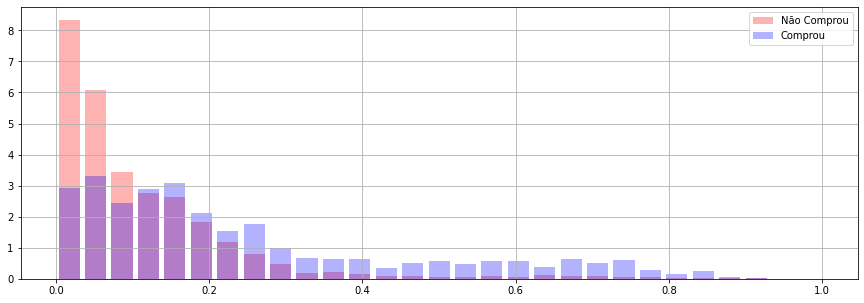

In [49]:
plt.figure(figsize = (15,5))
plt.hist(pred[y_ts2== 0,1], bins= np.linspace(0,1,30), color= 'r', alpha= .3, rwidth=.8, density= True, label= 'Não Comprou')
plt.hist(pred[y_ts2== 1,1], bins= np.linspace(0,1,30), color= 'b', alpha= .3, rwidth=.8, density= True, label= 'Comprou')
plt.legend()
plt.grid()